# Imports

In [2]:
import os
import re
import time
import enum


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# import git


import torch
from torch import nn
from torch.optim import Adam
from torchvision import transforms, datasets
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# FS set up

In [3]:
BINARIES_PATH = os.path.join(os.getcwd(), 'models', 'binaries')
CHECKPOINTS_PATH = os.path.join(os.getcwd(), 'models', 'checkpooints')
DATA_DIR_PATH = os.path.join(os.getcwd(), 'data')
DEBUG_IMAGERY_PATH = os.path.join(DATA_DIR_PATH, 'data')

# Data import and preprocessing

In [12]:
batch_size = 64

# pytorch data transforms pipeline to normalize img to tensors of range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,), (.5,))
])

# downloading the MNIST dataset
mnist_dataset = datasets.MNIST(root=DATA_DIR_PATH, train=True, download=True, transform=transform)

# set up data loader (wrapper class that loads images in batches)
mnist_data_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 329589288.78it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 102570443.54it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 134362204.63it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7441612.80it/s]


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



# Data analysis

Data set size: 60000 images
Image shape: torch.Size([28, 28])
Image channels: 1


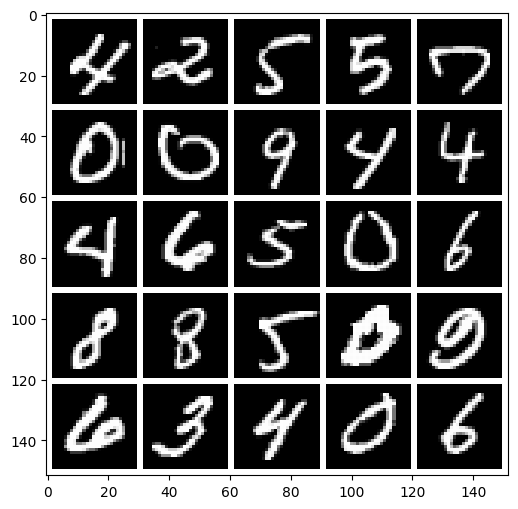

In [15]:
print(f'Data set size: {len(mnist_dataset)} images')

num_imgs_viz = 25
batch = next(iter(mnist_data_loader))
img_batch = batch[0]    # batch[0] = images, batch[1] = labels
img_batch_subset = img_batch[:num_imgs_viz]

# shape format [0] = L, [1] = C, [2] = H, [3] = W
print(f'Image shape: {img_batch_subset.shape[2:]}')
print(f'Image channels: {img_batch_subset.shape[1]}')

# displaying sample images
grid = make_grid(img_batch_subset, nrow=int(np.sqrt(num_imgs_viz)), normalize=True, pad_value=1.)
grid = np.moveaxis(grid.numpy(), 0, 2)    # covert img format from CHW -> HWC (matpltlib format)
plt.figure(figsize=(6,6))
plt.imshow(grid)
plt.show()

In [ ]:
MNIST_IMG_SIZE = 28